In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model, neighbors, cross_validation, grid_search

%matplotlib inline

In [2]:
df = pd.read_csv(os.path.join('dataset','auto-mpg.csv'))

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino


In [7]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [13]:
len(df)

398

In [40]:
train_df = df.sample(frac=.6, random_state = 0)
test_df = df.drop(train_df.index)

train_df.reset_index(inplace=True)
test_df.reset_index(inplace = True)

In [15]:
df.model_year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [3]:
train_col = ['cylinders','displacement','horsepower','weight','acceleration']

In [6]:
model = smf.ols(formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration', data = train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     105.8
Date:                Tue, 29 Mar 2016   Prob (F-statistic):           1.66e-57
Time:                        19:42:41   Log-Likelihood:                -681.29
No. Observations:                 235   AIC:                             1375.
Df Residuals:                     229   BIC:                             1395.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       47.4927      3.689     12.875      0.000        40.225    54.761
cylinders       -0.6693      0.566     -1.183      0.238        -1.784     0.445
displacement    -0.0021      0.012     -0.168      0.867        -0.026     0.022
horsepower      -0.0448      0.022     -2.049      0.042        -0.088    -0.002
weight          -0.0046      0.001     -4.390      0.000        -0.007    -0.003
acceleration    -0.0900      0.166     -0.543      0.588        -0.417     0.237
==============================================================================
Omnibus:                       23.430   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.024
Skew:                           0.656   Prob(JB):                     1.11e-07
Kurtosis:                       4.244   Cond. No.                     3.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
df[pd.isnull(df).any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name


In [38]:
df.dropna(axis = 0, how = 'any', inplace = True)

In [ ]:
df.plot(kind = 'scatter', x = 'horsepower', y = 'mpg')
plt.show()

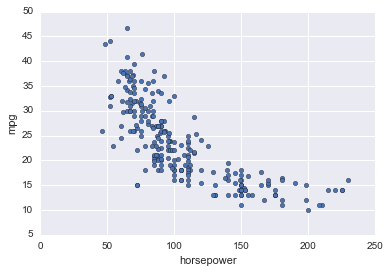

In [11]:
train_df.plot(kind = 'scatter', x = 'horsepower', y = 'mpg')

In [42]:
train_df['horsepower_log'] = train_df['horsepower'].apply(np.log10)

In [43]:
train_df['horsepower_sqrt'] = train_df['horsepower'].apply(np.sqrt)

In [44]:
train_df['horsepower_sq'] = train_df['horsepower'].apply(np.square)

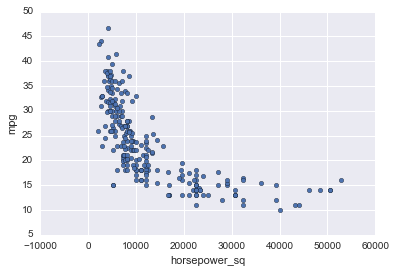

In [18]:
train_df.plot(kind = 'scatter', x = 'horsepower_sq', y = 'mpg')

In [45]:
train_df['gpm'] = 1/train_df['mpg']

In [46]:
train_df['displacement_sqrt'] = train_df['displacement'].apply(np.sqrt)

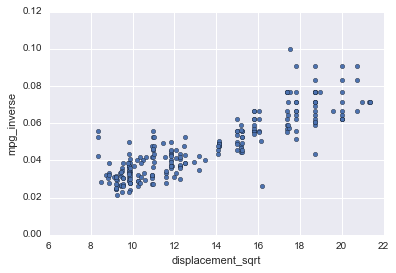

In [22]:
train_df.plot(kind = 'scatter', x = 'displacement_sqrt',y = 'mpg_inverse')

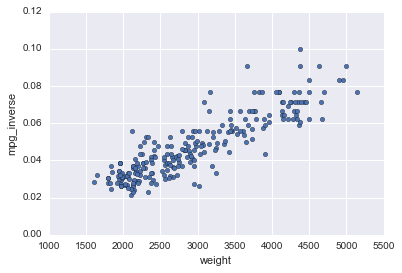

In [30]:
train_df.plot(kind = 'scatter', x = 'weight',y = 'mpg_inverse')

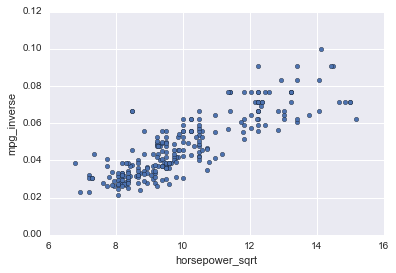

In [29]:
train_df.plot(kind = 'scatter', x = 'horsepower_sqrt',y = 'mpg_inverse')

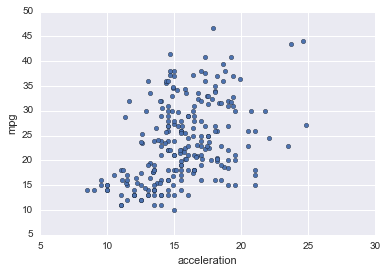

In [25]:
train_df.plot(kind = 'scatter', x = 'acceleration',y = 'mpg')

In [31]:
model = smf.ols(formula = 'mpg_inverse ~ displacement_sqrt + horsepower_sqrt + weight', data = train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            mpg_inverse   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     325.2
Date:                Tue, 29 Mar 2016   Prob (F-statistic):           1.30e-82
Time:                        20:10:25   Log-Likelihood:                 821.56
No. Observations:                 235   AIC:                            -1635.
Df Residuals:                     231   BIC:                            -1621.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -0.0164      0.003     -5.406      0.000        -0.022    -0.010
displacement_sqrt     0.0009      0.000      2.011      0.046      1.72e-05     0.002
horsepower_sqrt       0.0025      0.001      4.280      0.000         0.001     0.004
weight             9.092e-06   1.68e-06      5.407      0.000      5.78e-06  1.24e-05
==============================================================================
Omnibus:                       14.409   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.560
Skew:                           0.455   Prob(JB):                     9.33e-05
Kurtosis:                       4.033   Cond. No.                     1.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
train_x = train_df[['displacement_sqrt','horsepower_sqrt','weight']]
train_y = train_df['gpm']


In [49]:
model = linear_model.LinearRegression()

In [50]:
cross_validation.cross_val_score(model, train_x, train_y, cv = 10).mean()

0.7814784348614251

In [51]:
train_df['displacement_cbrt'] = train_df['displacement'].apply(np.power(,3))

SyntaxError: invalid syntax (<ipython-input-51-acca2e2e036f>, line 1)

In [52]:
df['mpg_cat'] = 'above'
df.loc[df.mpg < train_df.mpg.quantile(.5), 'mpg_cat'] = 'below'

